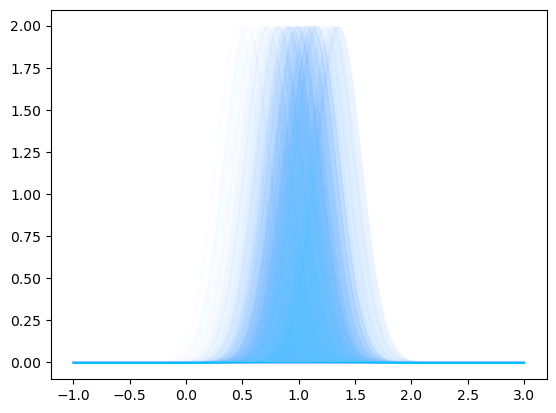

In [ ]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import math
import matplotlib.image as mpimg

#MANCANO TUTTE LE LEGENDE AI GRAFICI 

'''def likelihood_gauss (mu_t, sigma_t, mu_range, n_data):
    dist_gauss = norm.rvs(mu_t, sigma_t, size = n_data)
    L_Gauss = []
    for mu in mu_range:
        L_G_temp = norm.logpdf(dist_gauss,mu)
        L_G_sum = np.sum(L_G_temp)
        L_Gauss = np.append(L_Gauss, L_G_sum)
    return L_Gauss
'''

fig1, ax1 = plt.subplots()
n_data = 100
mu_t = 1
sigma_t = 0.2
mu_prec = 1000
mu_min = -1
mu_max = 3
mu_range = np.linspace(mu_t-2, mu_t+2, mu_prec)
x_data = norm.rvs(mu_t, sigma_t, size = n_data)
logL_Gauss = np.full(1000,0.)
#lyne_color =['blue', 'red', 'green', 'orange', 'purple']
for x in x_data:
    like_temp = []
    for mu in mu_range:
        dist_gauss = norm.pdf(x, mu, sigma_t)
        like_temp = np.append(like_temp, dist_gauss)
    ax1.plot(mu_range, like_temp, linewidth = 1.5, color = 'deepskyblue', alpha = 0.006)
    ax1.fill_between(mu_range, like_temp, color="deepskyblue", alpha=0.006)    
    logL_Gauss += np.log(like_temp, out = like_temp)
plt.show()


1.0180180180180178
1.0172466294998104


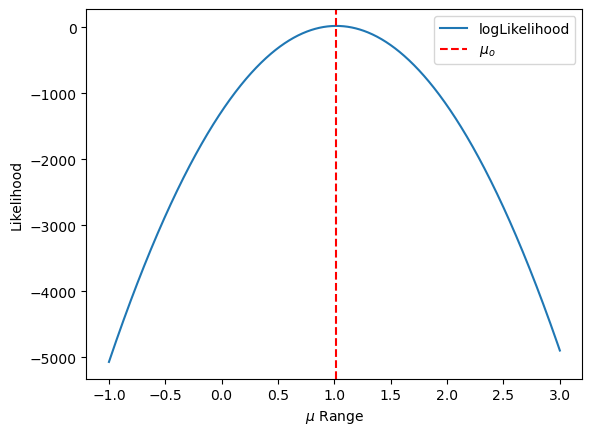

In [3]:
fig2, ax2 = plt.subplots()
index = np.where(logL_Gauss == logL_Gauss.max())
index = index[0][0]
mean_l = mu_range[index]
print(mean_l)
mean_o =sum(x_data/n_data)
print(mean_o)

plt.plot(mu_range, logL_Gauss, linewidth = 1.5, label = "logLikelihood")
plt.axvline(x=sum(x_data)/n_data, color="red", linestyle="--", label=r"$\mu_o$")
plt.xlabel(r"$\mu$ Range")
plt.ylabel("Likelihood")
plt.legend(loc = "upper right")

0.019979999999999696
0.02006424936656308


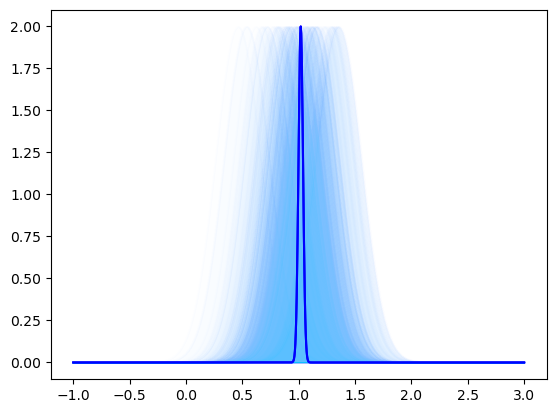

In [6]:
delta_mu = (mu_max - mu_min)/mu_prec
deriv_1 = np.diff(logL_Gauss)
deriv_2 = np.diff(deriv_1)/(delta_mu*delta_mu)
sigma_l = 1/math.sqrt(-deriv_2[index])
print(sigma_l)
dev_o = x_data-mean_o
dev_o_sq = np.square(dev_o, out = dev_o)
sigma_o = sum(dev_o_sq)/(n_data-1)
devstd_mean_o = np.sqrt(sigma_o/n_data)
print(devstd_mean_o)

x_set = np.linspace(-1, 3, 1000)
norm_finale = norm.pdf(x_set, mean_l, sigma_l)/10
ax1.plot(x_set, norm_finale, color = 'b')
display(fig1)